In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['animation.html'] = 'html5'
%config InlineBackend.figure_format = 'retina'

In [2]:
!./test_heat_eqn

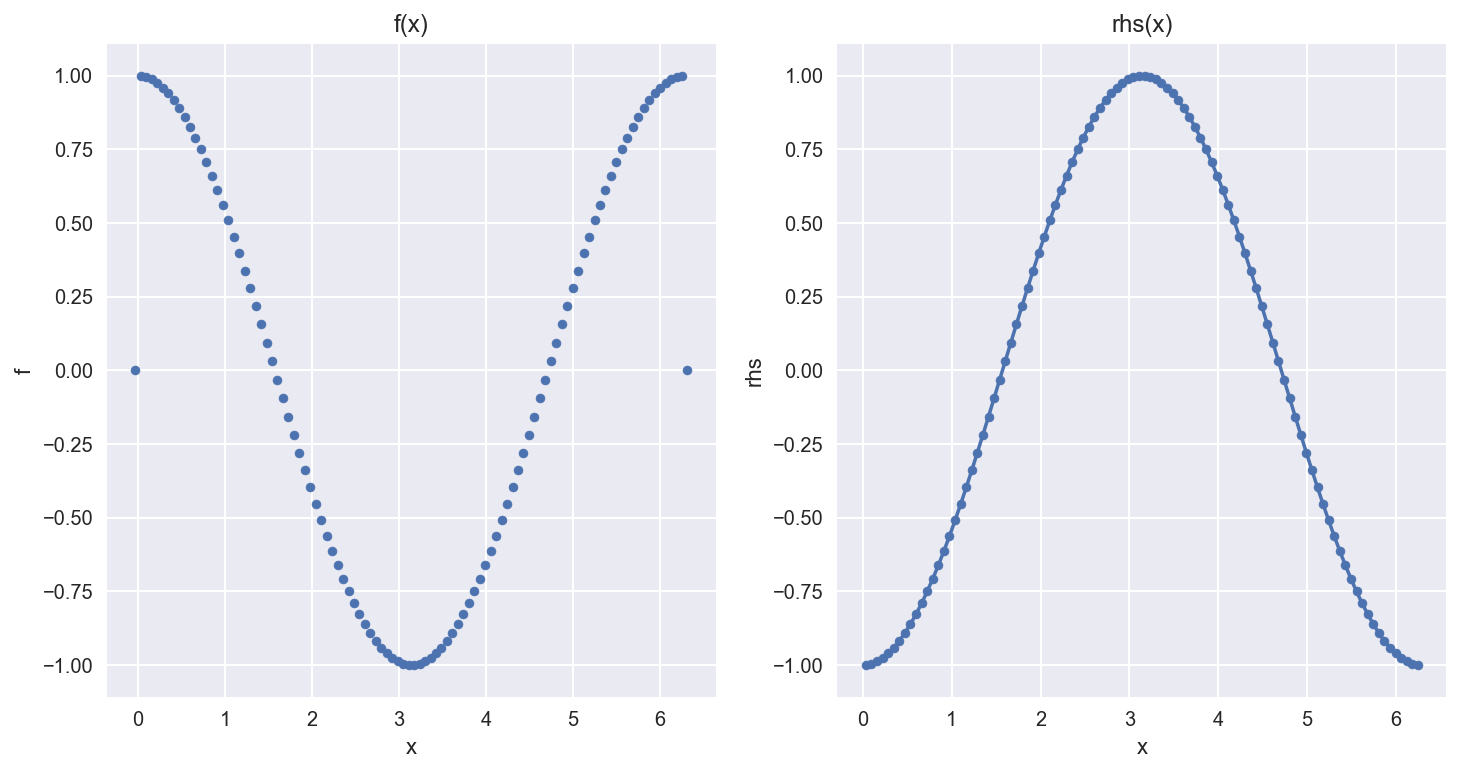

In [3]:
fig, ax = plt.subplots(1, 2)
df1 = pd.read_table("x-0.asc", sep=" ", header=None, names=("x", "f"))
df2 = pd.read_table("rhs-0.asc", sep=" ", header=None, names=("x", "rhs"))
df1.plot(x="x", y="f", kind="scatter", title="f(x)", ax=ax[0])
df2.plot(x="x", y="rhs", kind="scatter", title="rhs(x)", ax=ax[1])
x = df2["x"]
ax[1].plot(x, -np.cos(x));

In [4]:
!./heat_eqn_solve

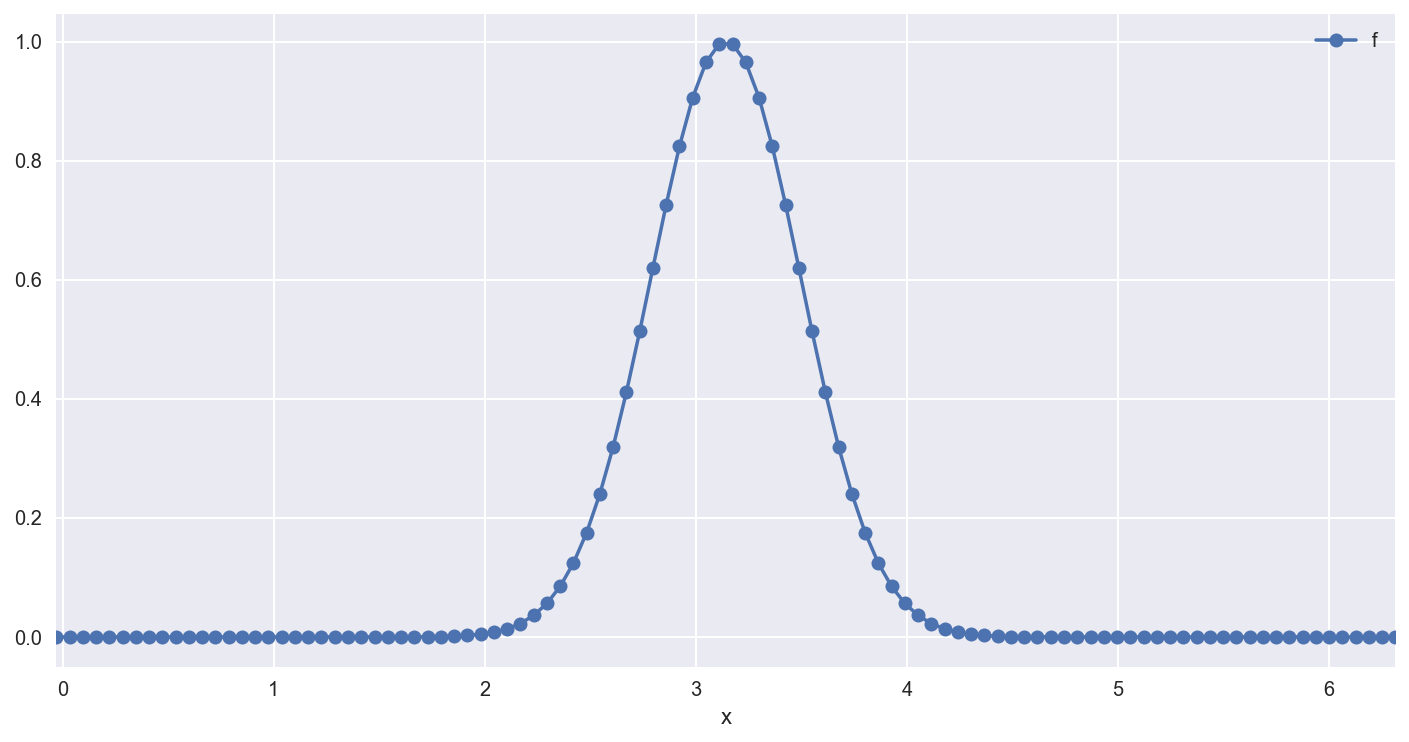

In [5]:
df = pd.read_table("x0-0.asc", sep=" ", header=None, names=("x", "f"))
df.plot(x="x", y="f", style="o-");

In [6]:
fig, ax = plt.subplots()

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, 1)

line, = ax.plot([], [], lw=2)
plt.close()

In [7]:
def init():
    #line.set_data([], [])
    return (line,)

def animate(i):
    df = pd.read_table("x{}-0.asc".format(i*10), sep=" ", header=None, names=("x", "f"))
    line.set_data(df["x"], df["f"])
    return (line,)

In [9]:
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=16, interval=200, blit=True)